In [41]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import random

import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import axes3d

In [39]:
#Generate data - 3 clusters (1, 2, 3)
mean_1 = [2, 1, 1]
cov_1 = [[0.5, 0.1, 0.2], [0.1, 0.5, 0], [0.2, 0, 0.5]]

mean_2 = [10, 3, 5]
cov_2 = [[0.5, 0.1, 0.2], [0.1, 0.5, 0], [0.2, 0, 0.5]]

mean_3 = [8, 8, 8]
cov_3 = [[0.5, 0.1, 0.2], [0.1, 0.5, 0], [0.2, 0, 0.5]]

x1, y1, z1 = np.random.multivariate_normal(mean_1, cov_1, 1000, check_valid = 'ignore').T
x2, y2, z2 = np.random.multivariate_normal(mean_2, cov_2, 1000, check_valid = 'ignore').T
x3, y3, z3 = np.random.multivariate_normal(mean_3, cov_3, 1000, check_valid = 'ignore').T

In [158]:
#initialize centroids
c1x, c1y, c1z = random.uniform(0,10), random.uniform(0,10), random.uniform(0,10)
c2x, c2y, c2z = random.uniform(0,10), random.uniform(0,10), random.uniform(0,10)
c3x, c3y, c3z = random.uniform(0,10), random.uniform(0,10), random.uniform(0,10)

In [159]:
def plot_kmeans(x1, x2, x3, y1, y2, y3, z1, z2, z3, c1x, c1y, c1z, c2x, c2y, c2z, c3x, c3y, c3z, alpha):

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x1, y1, z1, alpha = alpha)
    ax.scatter(x2, y2, z2, alpha = alpha)
    ax.scatter(x3, y3, z3, alpha = alpha)

    ax.scatter(c1x, c1y, c1z, color = "black")
    ax.scatter(c2x, c2y, c2z, color = "purple")
    ax.scatter(c3x, c3y, c3z, color = "red")

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.set_xlim(0, 12)
    ax.set_ylim(0, 12)
    ax.set_zlim(0, 12)

    ax.view_init(elev = 20, azim = 10)

    ax.invert_yaxis()

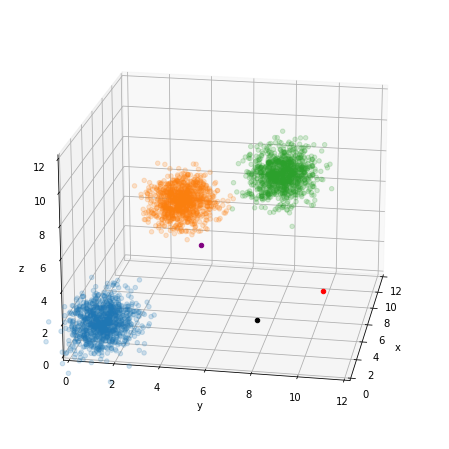

In [160]:
plot_kmeans(x1, x2, x3, y1, y2, y3, z1, z2, z3, c1x, c1y, c1z, c2x, c2y, c2z, c3x, c3y, c3z, alpha = 0.2)

In [161]:
#concatentate data
x = np.concatenate((x1, x2, x3), axis = 0)
y = np.concatenate((y1, y2, y3), axis = 0)
z = np.concatenate((z1, z2, z3), axis = 0)

In [162]:
def update_centroids(c1x, c1y, c1z, c2x, c2y, c2z, c3x, c3y, c3z, x, y, z):
    #initialize stacks belonging to each centroid
    c1x_points = []
    c2x_points = []
    c3x_points = []
    
    c1y_points = []
    c2y_points = []
    c3y_points = []
    
    c1z_points = []
    c2z_points = []
    c3z_points = []
    
    #calculate distance for each point and assign each point to the correct centroid
    for i in range(len(x)):
        dist1 = np.sqrt((x[i] - c1x)**2 + (y[i] - c1y)**2 + (z[i] - c1z)**2)
        dist2 = np.sqrt((x[i] - c2x)**2 + (y[i] - c2y)**2 + (z[i] - c2z)**2)
        dist3 = np.sqrt((x[i] - c3x)**2 + (y[i] - c3y)**2 + (z[i] - c3z)**2)

        if (dist1 < dist2) and (dist1 < dist3):
            c1x_points.append(x[i])
            c1y_points.append(y[i])
            c1z_points.append(z[i])

        elif (dist2 < dist1) and (dist2 < dist3):
            c2x_points.append(x[i])
            c2y_points.append(y[i])
            c2z_points.append(z[i])
            
        elif (dist3 < dist1) and (dist3 < dist2):
            c3x_points.append(x[i])
            c3y_points.append(y[i])
            c3z_points.append(z[i])
            
    #update centroids
    c1x, c1y, c1z = np.mean(c1x_points), np.mean(c1y_points), np.mean(c1z_points)
    c2x, c2y, c2z = np.mean(c2x_points), np.mean(c2y_points), np.mean(c2z_points)
    c3x, c3y, c3z = np.mean(c3x_points), np.mean(c3y_points), np.mean(c3z_points)
    
    return c1x, c1y, c1z, c2x, c2y, c2z, c3x, c3y, c3z

Initial positions (step 0)


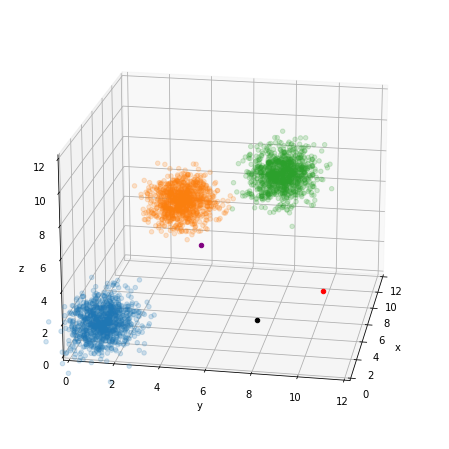

Step 1:


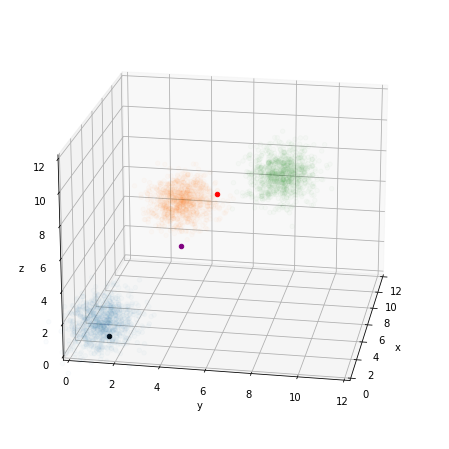

Step 2:


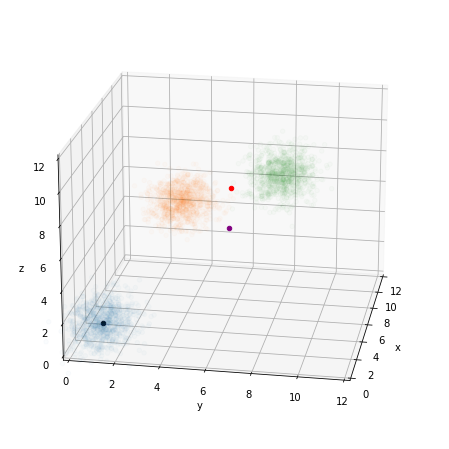

Step 3:


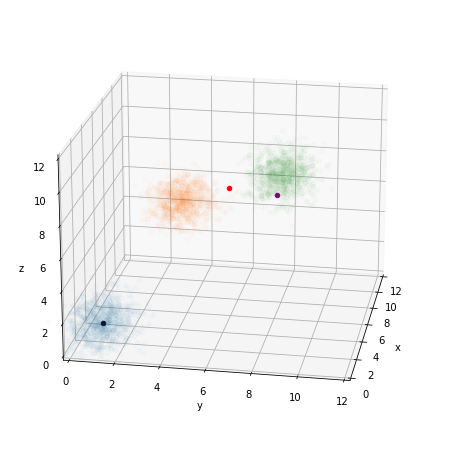

Step 4:


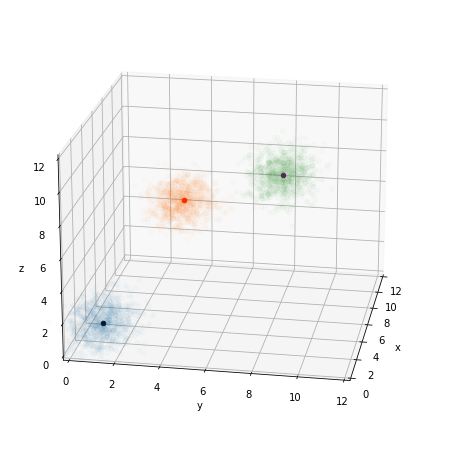

Step 5:


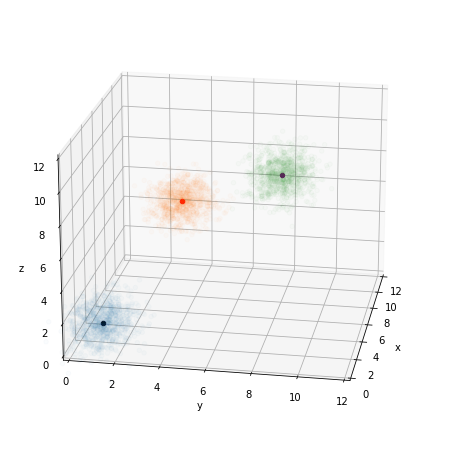

In [163]:
epochs = 5

print('Initial positions (step 0)')
plot_kmeans(x1, x2, x3, y1, y2, y3, z1, z2, z3, c1x, c1y, c1z, c2x, c2y, c2z, c3x, c3y, c3z, alpha = 0.2)

plt.show()

for i in range(epochs):
    print(f"Step {i+1}:")
    c1x, c1y, c1z, c2x, c2y, c2z, c3x, c3y, c3z = update_centroids(c1x, c1y, c1z, c2x, c2y, c2z, c3x, c3y, c3z, x, y, z)
    # Create a joint plot
    plot_kmeans(x1, x2, x3, y1, y2, y3, z1, z2, z3, c1x, c1y, c1z, c2x, c2y, c2z, c3x, c3y, c3z, alpha=0.02)
    
    plt.show()